# 2D Riemann

[![DownloadNotebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_notebook_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindflow/en/cfd_solver/mindspore_riemann2d.ipynb)&emsp;[![DownloadCode](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_download_code_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindflow/en/cfd_solver/mindspore_riemann2d.py)&emsp;[![View Source On Gitee](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_source_en.svg)](https://gitee.com/mindspore/docs/blob/master/docs/mindflow/docs/source_en/cfd_solver/riemann2d.ipynb)

This notebook requires **MindSpore version >= 2.0.0** to support new APIs including: *mindspore.jit, mindspore.jit_class*.

A Riemann problem, named after Bernhard Riemann, is a specific initial value problem composed of a conservation equation together with piecewise constant initial data which has a single discontinuity in the domain of interest. The Riemann problem is very useful for the understanding of equations like Euler conservation equations because all properties, such as shocks and rarefaction waves, appear as characteristics in the solution. It also gives an exact solution to some complex nonlinear equations, such as the Euler equations.

In numerical analysis, Riemann problems appear in a natural way in finite volume methods for the solution of conservation law equations due to the discreteness of the grid. For that it is widely used in computational fluid dynamics and in computational magnetohydrodynamics simulations.

## Problem Description

The definition of the 2 dimensional Riemann problem is:

$$
\frac{\partial}{\partial t} \left(\begin{matrix} \rho \\ \rho u \\ \rho v \\ E \\\end{matrix} \right) + \frac{\partial}{\partial x} \left(\begin{matrix} \rho u \\ \rho u^2 + p \\ \rho u v \\ u(E + p) \\\end{matrix} \right) + \frac{\partial}{\partial y} \left(\begin{matrix} \rho v \\ \rho uv \\ \rho v^2 + p \\ v(E + p) \\\end{matrix} \right) = 0
$$

$$
E = \frac{\rho}{\gamma - 1} + \frac{1}{2}\rho u^2
$$

where $\gamma = 1.4$ for ideal gas. The initial condition is:

$$
\left(\begin{matrix} \rho \\ u \\ v \\ p \\\end{matrix}\right)_{x<0.5, y>0.5} = \left(\begin{matrix} 0.5323 \\ 1.206 \\ 0.0 \\ 0.3 \\\end{matrix}\right), \quad
\left(\begin{matrix} \rho \\ u \\ v \\ p \\\end{matrix}\right)_{x>0.5, y>0.5} = \left(\begin{matrix} 1.5 \\ 0.0 \\ 0.0 \\ 1.5 \\\end{matrix}\right)
$$

$$
\left(\begin{matrix} \rho \\ u \\ v \\ p \\\end{matrix}\right)_{x<0.5, y<0.5} = \left(\begin{matrix} 0.138 \\ 1.206 \\ 1.206 \\ 0.029 \\\end{matrix}\right), \quad
\left(\begin{matrix} \rho \\ u \\ v \\ p \\\end{matrix}\right)_{x>0.5, y<0.5} = \left(\begin{matrix} 0.5323 \\ 0.0 \\ 1.206 \\ 0.3 \\\end{matrix}\right)
$$

The following `src` pacakage can be downloaded in [src](https://gitee.com/mindspore/mindscience/tree/master/MindFlow/applications/cfd/riemann2d/src).

In [1]:
import mindspore as ms
from mindflow import load_yaml_config, vis_2d
from mindflow import cfd
from mindflow.cfd.runtime import RunTime
from mindflow.cfd.simulator import Simulator

from src.ic import riemann2d_ic

ms.set_context(device_target="GPU", device_id=3)

## Defining Simulator and RunTime

The mesh, material, runtime, boundary conditions and numerical methods are defined in [numeric.yaml](https://gitee.com/mindspore/mindscience/blob/master/MindFlow/applications/cfd/riemann2d/numeric.yaml).

In [2]:
config = load_yaml_config('numeric.yaml')
simulator = Simulator(config)
runtime = RunTime(config['runtime'], simulator.mesh_info, simulator.material)

## Initial Condition

Initial condition is determined according to mesh coordinates.

In [3]:
mesh_x, mesh_y, _ = simulator.mesh_info.mesh_xyz()
pri_var = riemann2d_ic(mesh_x, mesh_y)
con_var = cfd.cal_con_var(pri_var, simulator.material)

## Running Simulation

Run CFD simulation with time marching.

In [4]:
while runtime.time_loop(pri_var):
    pri_var = cfd.cal_pri_var(con_var, simulator.material)
    runtime.compute_timestep(pri_var)
    con_var = simulator.integration_step(con_var, runtime.timestep)
    runtime.advance()

current time = 0.000000, time step = 0.001005
current time = 0.001005, time step = 0.001005
current time = 0.002010, time step = 0.001005
current time = 0.003016, time step = 0.001005
current time = 0.004021, time step = 0.001005
current time = 0.005026, time step = 0.001005
current time = 0.006031, time step = 0.001005
current time = 0.007036, time step = 0.001005
current time = 0.008041, time step = 0.001005
current time = 0.009046, time step = 0.001005
current time = 0.010051, time step = 0.001005
current time = 0.011057, time step = 0.001005
current time = 0.012062, time step = 0.001005
current time = 0.013067, time step = 0.001005
current time = 0.014072, time step = 0.001005
current time = 0.015076, time step = 0.001005
current time = 0.016081, time step = 0.001005
current time = 0.017086, time step = 0.001005
current time = 0.018091, time step = 0.001005
current time = 0.019097, time step = 0.001005
current time = 0.020102, time step = 0.001005
current time = 0.021107, time step

## Post Processing

You can view the density, pressure and velocity.

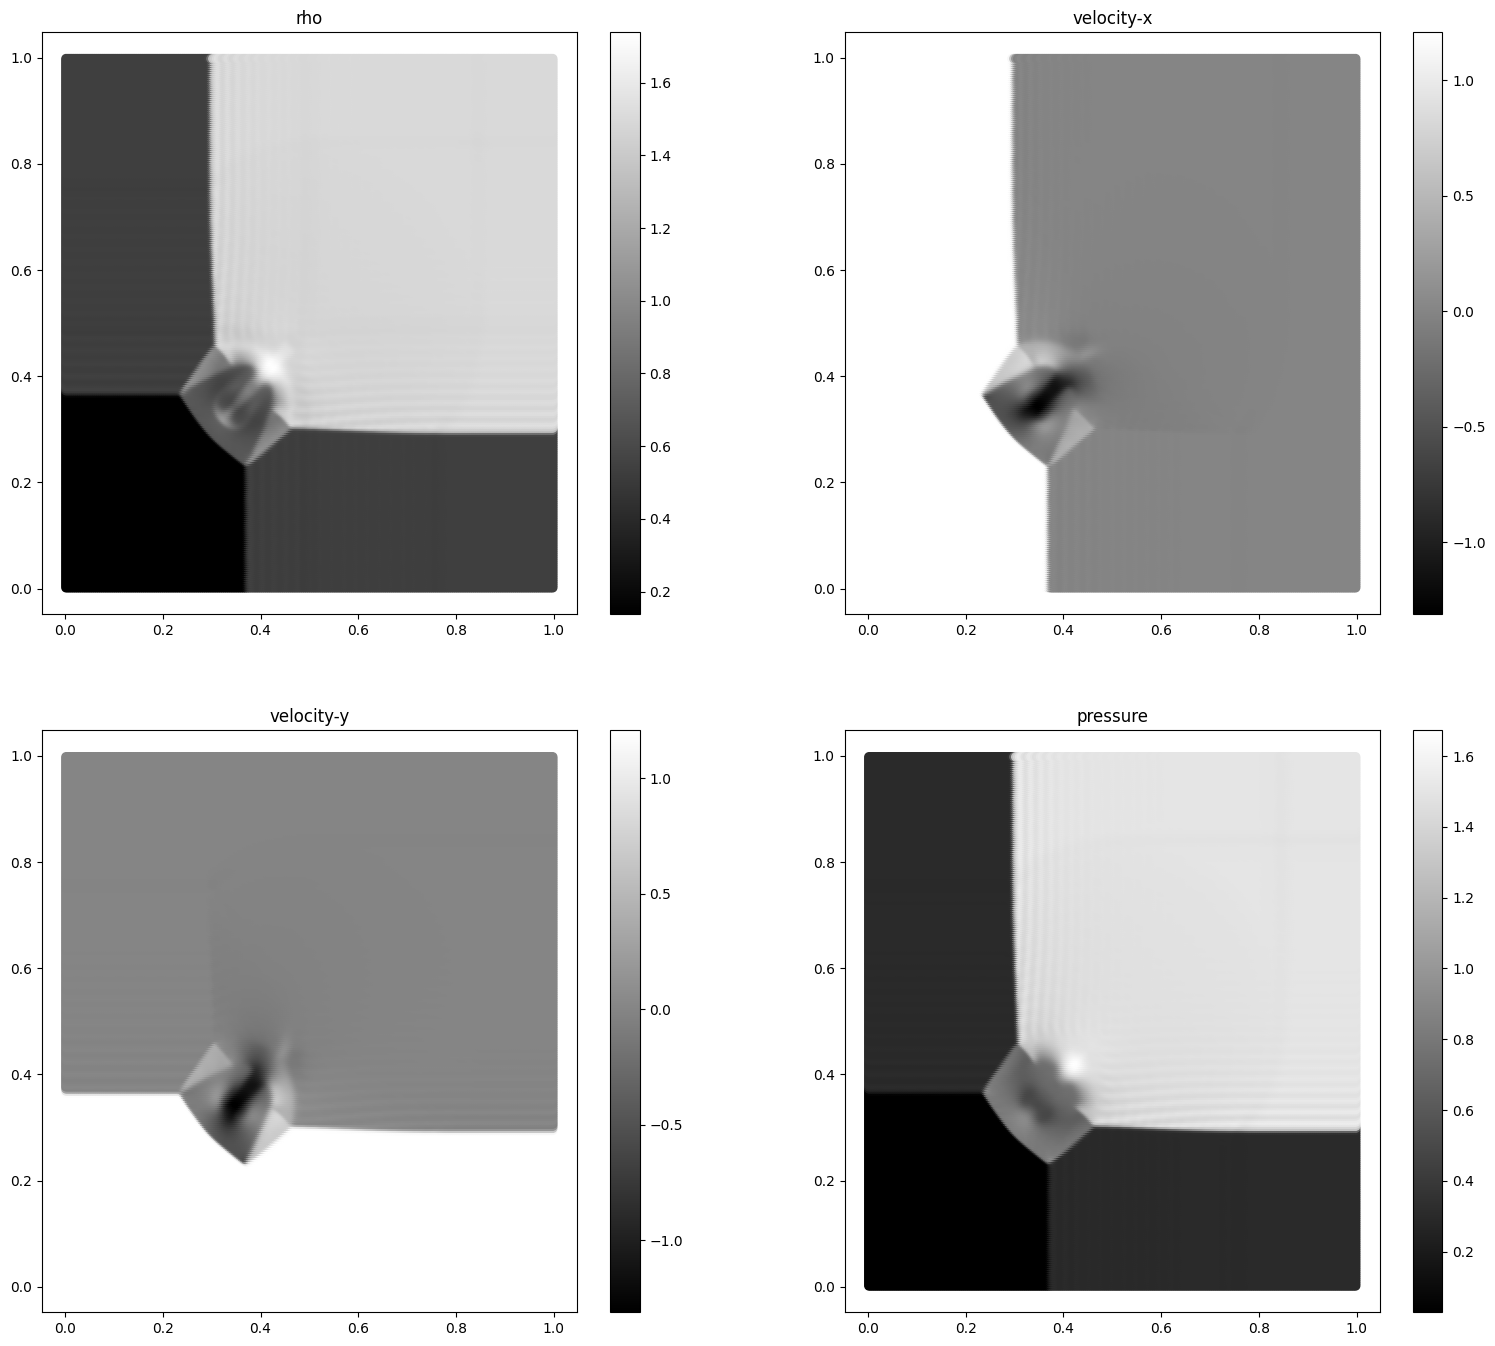

In [5]:
pri_var = cfd.cal_pri_var(con_var, simulator.material)
vis_2d(pri_var, 'riemann2d.jpg')